## Problem 5

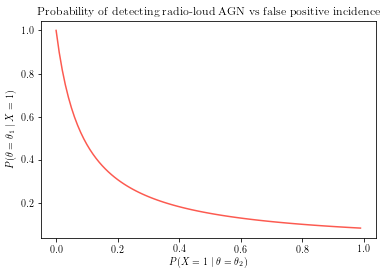

In [25]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# Probability that our result is a false positive
false_positive = np.arange(0.0,1.0,0.01)

# Estimated prevelance of radio-loud AGN
radio_loud_prev_est = 0.1

# Sensitivity to true positives
sensitivity = 0.8

# Use TeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(false_positive, (sensitivity * radio_loud_prev_est)/(sensitivity * radio_loud_prev_est + false_positive * (1-radio_loud_prev_est)),  color='xkcd:coral')

plt.xlabel(r'$P(X = 1 \;|\; \theta = \theta_2)$')
plt.ylabel(r'$P(\theta = \theta_1\;|\;X = 1)$')
plt.title(r'Probability of detecting radio-loud AGN vs false positive incidence')

plt.savefig('plot.png', dpi = 300)

plt.show()

## Problem 6

In [26]:
# Set the parameters for our triangle distribution
a = 2.0
mode = 0.0

# Get distribution with 10**6 values
sample = np.random.triangular(-a, mode, a, 10**6)

print("(6b)")
mean, variance = (np.mean(sample), np.var(sample))
print("Mean:\t\t",mean,"\nExpected Mean:\t",0.0,"\n")
print("Var:\t\t", variance, "\nExpected Var:\t",a**2/6)

print("\n(6c)")
selected_samples = list(filter(lambda t : t > 0, sample))
print("P(X ≥ 0):\t\t",float(len(selected_samples))/len(list(sample)))
print("Expected P(X ≥ 0):\t",0.5)

(6b)
Mean:		 5.1945350226386776e-05 
Expected Mean:	 0.0 

Var:		 0.6650317251970745 
Expected Var:	 0.6666666666666666

(6c)
P(X ≥ 0):		 0.5004
Expected P(X ≥ 0):	 0.5


## Problem 7

In [28]:
trials = 10**5
stay_score = 0.0

for t in range(trials):
    # Monty Places the car and goats
    car_door = np.random.randint(0,3) # index is in the range (0,3] 
    
    # Contestant chooses one door
    guess = np.random.randint(0,3)
    
    # Monty Opens a goat door, but contestant does not switch
    
    # Monty opens remaining two doors to see if contestant won
    if car_door == guess:
        stay_score += 1.0

print("Without switching, you won ", round(stay_score / trials, 4) * 100, "% of the time.", sep = "")

switch_score = 0.0

for t in range(trials):
    # Monty places the car and goats
    car_door = np.random.randint(0,3)
    
    # Contestant chooses one door
    guess = np.random.randint(0,3)
    
    # Monty decides which goat door to show
    # At this point, he knows if the contestant chose correctly
    # and will act accordingly, but the contestant doesn't know
    new_doors = []
    if car_door != guess:
        new_doors = [car_door, guess]
    else:
        n = 1
        while n == guess:
            n = np.random.randint(0,3)
        new_doors = [guess, n]
        
    # Contestant switches doors
    # He doesn't know which of the above choices Monty made
    new_doors.remove(guess)
    guess = new_doors[0]
    
    # Monty opens remaining two doors to see if contesnant won
    if guess == car_door:
        switch_score += 1.0

print("After switching, you won ", round(switch_score / trials, 4) * 100, "% of the time.", sep = "")
    

Without switching, you won 33.19% of the time.
After switching, you won 66.8% of the time.


As expected, switching your door increases your chance of success from 1/3 to 2/3.